<a href="https://colab.research.google.com/github/Annafi06/ML-Basics/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Always keep raw backups
train_raw = train.copy()
test_raw = test.copy()

print(train.info())
print(train.isnull().sum())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


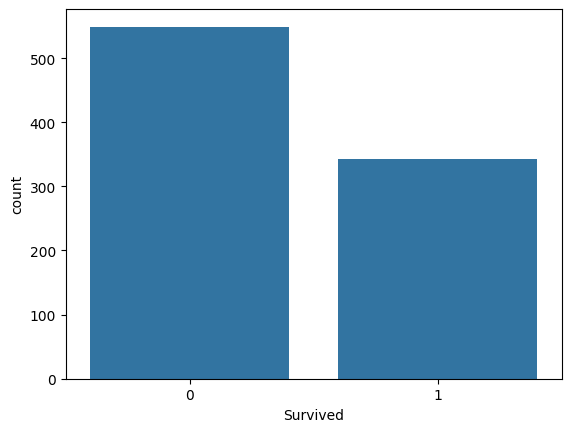

In [82]:
sns.countplot(x='Survived', data=train)
plt.show()

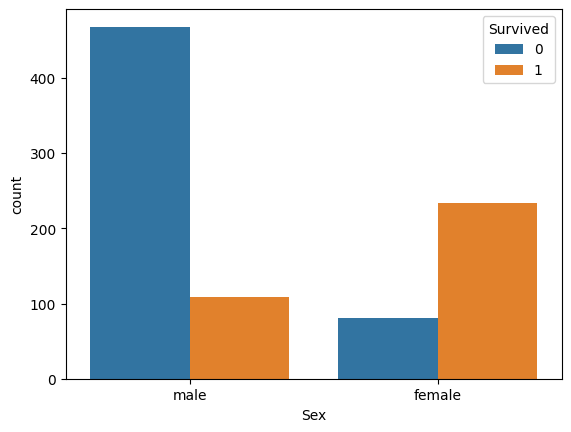

In [83]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

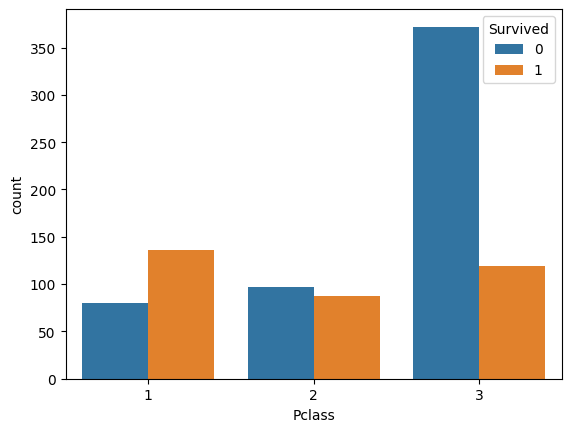

In [84]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

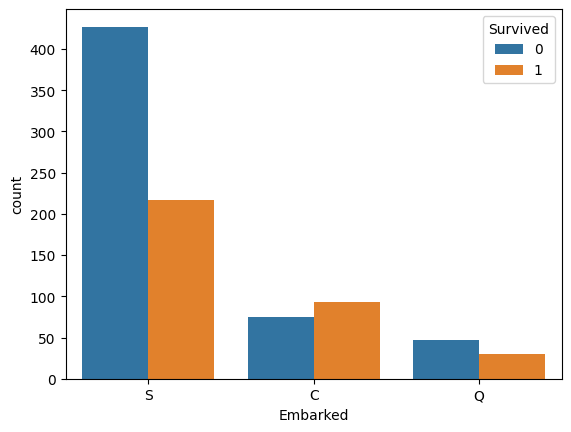

In [85]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.show()

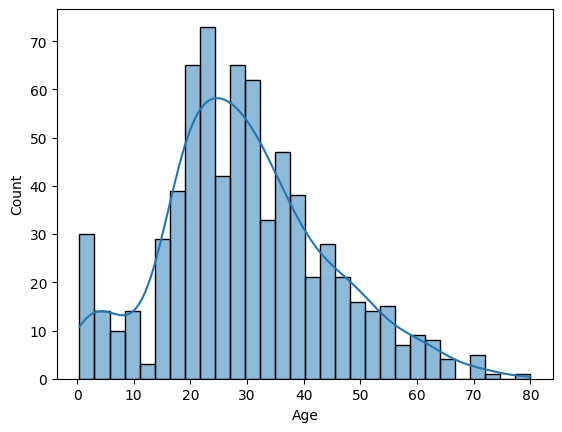

In [86]:
sns.histplot(train['Age'], bins=30, kde=True)
plt.show()

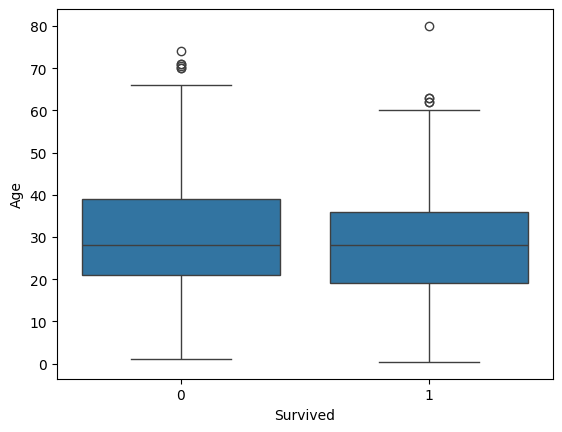

In [87]:
sns.boxplot(x='Survived', y='Age', data=train)
plt.show()

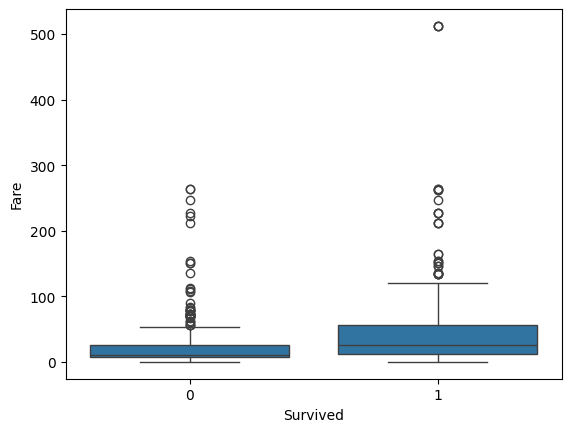

In [88]:
sns.boxplot(x='Survived', y='Fare', data=train)
plt.show()

In [89]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [90]:
train['Age'].fillna(train['Age'].median(), inplace=True)

/tmp/ipython-input-486169235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [91]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1031565505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [92]:
train.drop(columns=['Cabin'], inplace=True)

In [93]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

In [94]:
train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [95]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   FamilySize  891 non-null    int64  
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,2,False,True
1,1,1,1,38.0,1,0,71.2833,2,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,1,35.0,1,0,53.1000,2,False,True
4,0,3,0,35.0,0,0,8.0500,1,False,True


In [96]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [97]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [98]:
test['Age'].fillna(test['Age'].median(), inplace=True)

/tmp/ipython-input-2335094323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)


In [99]:
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1675548958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)


In [100]:
test.drop(columns=['Cabin'], inplace=True)

In [101]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

In [102]:
test.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [103]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   FamilySize  418 non-null    int64  
 7   Embarked_Q  418 non-null    bool   
 8   Embarked_S  418 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 23.8 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,True,False
1,3,1,47.0,1,0,7.0000,2,False,True
2,2,0,62.0,0,0,9.6875,1,True,False
3,3,0,27.0,0,0,8.6625,1,False,True
4,3,1,22.0,1,1,12.2875,3,False,True


In [104]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 9)


In [105]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [106]:
print(X.shape)
print(test.shape)

(891, 9)
(418, 9)


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [109]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print(confusion_matrix(y_val, y_pred_lr))

Logistic Regression Accuracy: 0.8044692737430168
[[98 12]
 [23 46]]


In [110]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_val)

print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print(confusion_matrix(y_val, y_pred_dt))

Decision Tree Accuracy: 0.7597765363128491
[[96 14]
 [29 40]]


In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))

Random Forest Accuracy: 0.8156424581005587
[[101   9]
 [ 24  45]]


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [113]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [114]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_val_scaled)

print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print(confusion_matrix(y_val, y_pred_knn))

KNN Accuracy: 0.8212290502793296
[[95 15]
 [17 52]]


In [119]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    random_state=42
)

rf_final.fit(X, y)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42)

In [126]:
test_predictions = rf_final.predict(test)